# Taller 2
- Alumno: José Nicolas Castillo Rojas

In [30]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Paso 1 
Utilice la imagen de soldadura que se encuentra en la intranet (adjunta con la tarea)

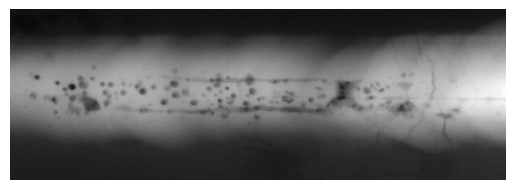

(333, 968)


In [31]:
img =cv2.imread('fallas.tif',cv2.IMREAD_GRAYSCALE)

plt.imshow(img,cmap="gray" ), plt.axis('off')

plt.show()
print(img.shape)

## Paso 1
Genere una nueva imagen ecualizada y comente los resultados respecto a la imagen original.

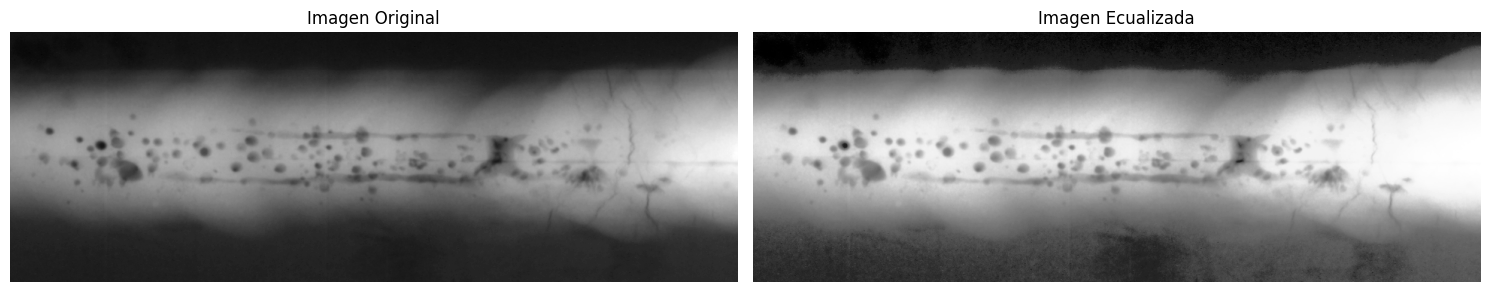

In [32]:
#canal_1, canal_2, canal_3 = cv2.split(img)
#canal_1_eq = cv2.equalizeHist(canal_1)
#canal_2_eq = cv2.equalizeHist(canal_2)
#canal_3_eq = cv2.equalizeHist(canal_3)
#img_ecualizada = cv2.merge((canal_1_eq, canal_2_eq, canal_3_eq))
img_ecualizada = cv2.equalizeHist(img)

plt.figure(figsize=(15, 10))
# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen ecualizada
plt.subplot(1, 2, 2)
plt.imshow(img_ecualizada, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

# Mostrar el multiplot
plt.tight_layout()
plt.show()

## Paso 2
Genere una imagen libre de ruido1 empleando el filtro de la mediana con la imagen obtenida en 
paso-2. Busque un valor óptimo que atenúe completamente las fallas empleando el filtro de la 
mediana. Una vez definido un determinado valor, utilícelo en los siguientes pasos (Importante: el 
tamaño de máscara debe ser impar, ver Hint)

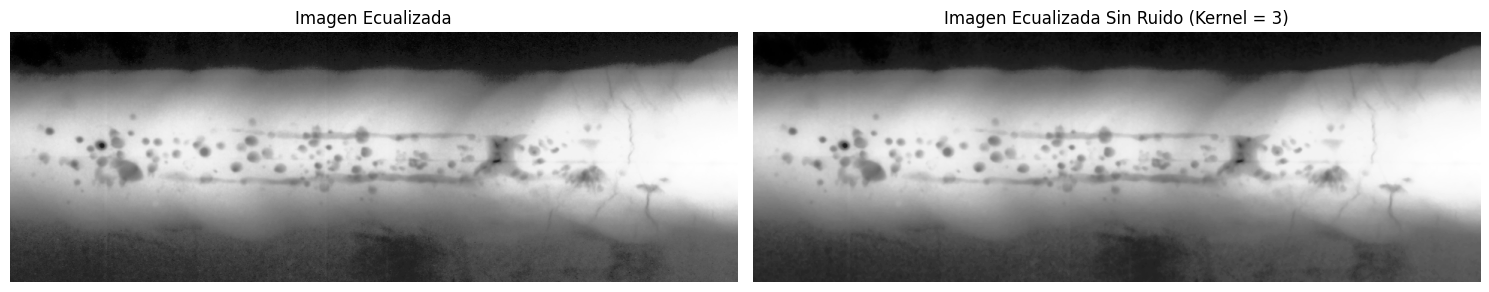

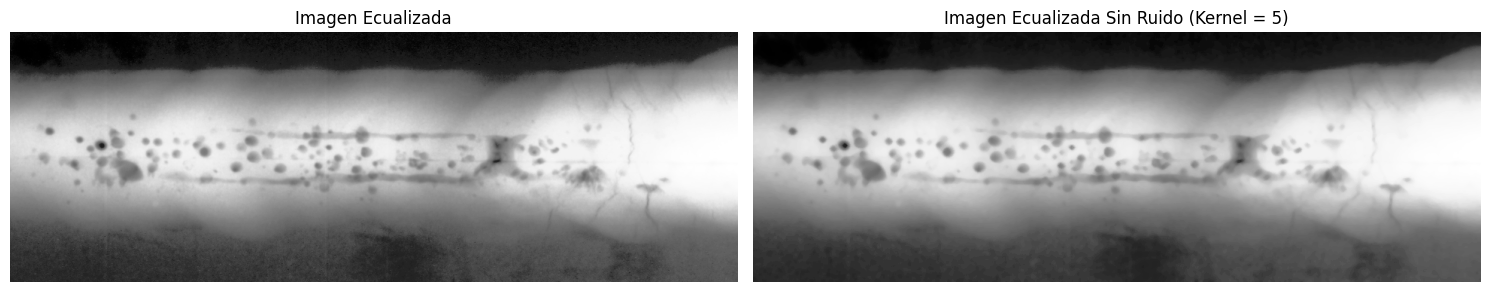

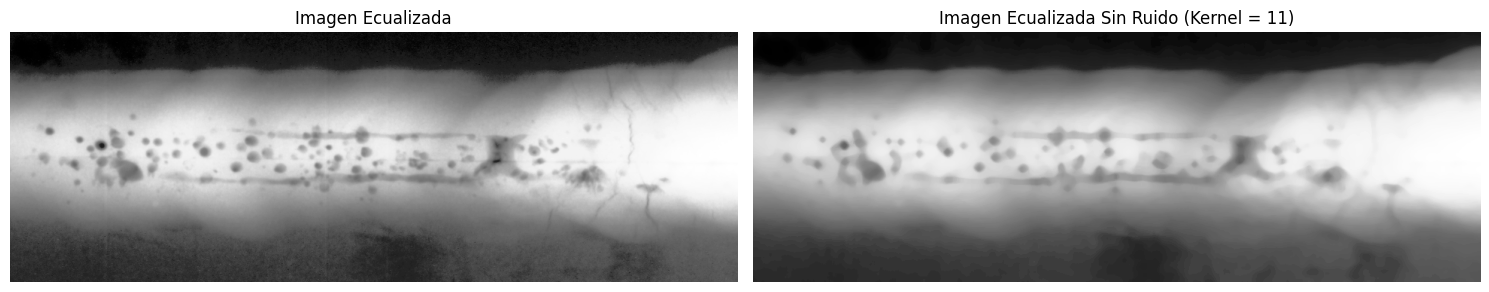

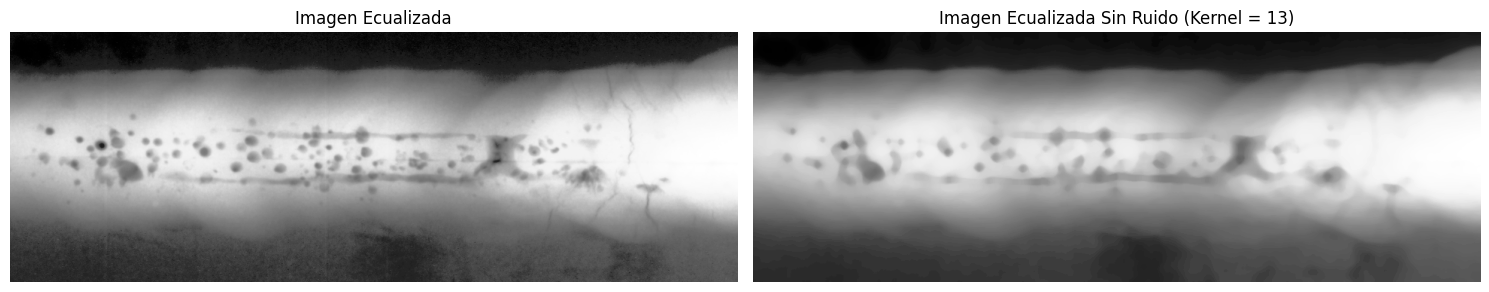

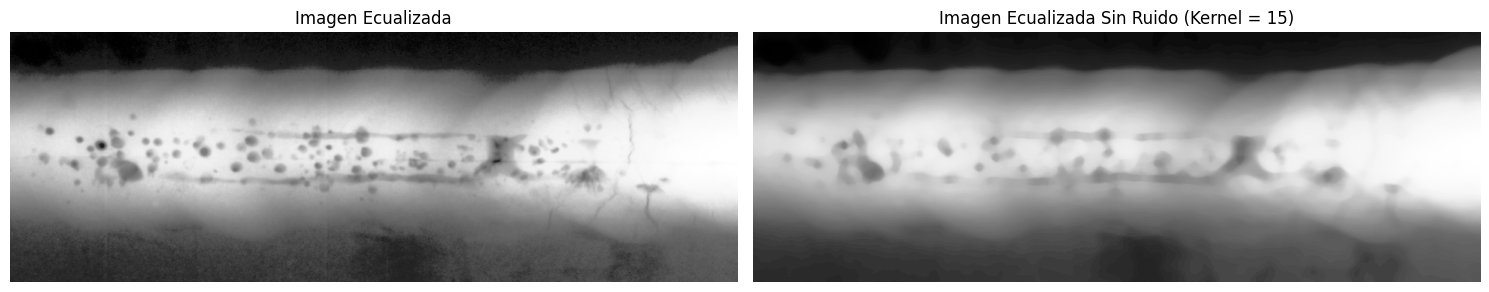

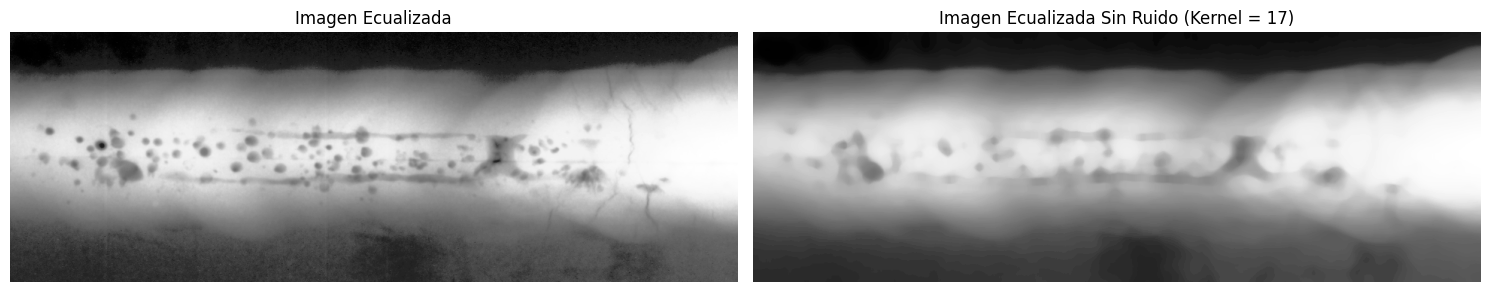

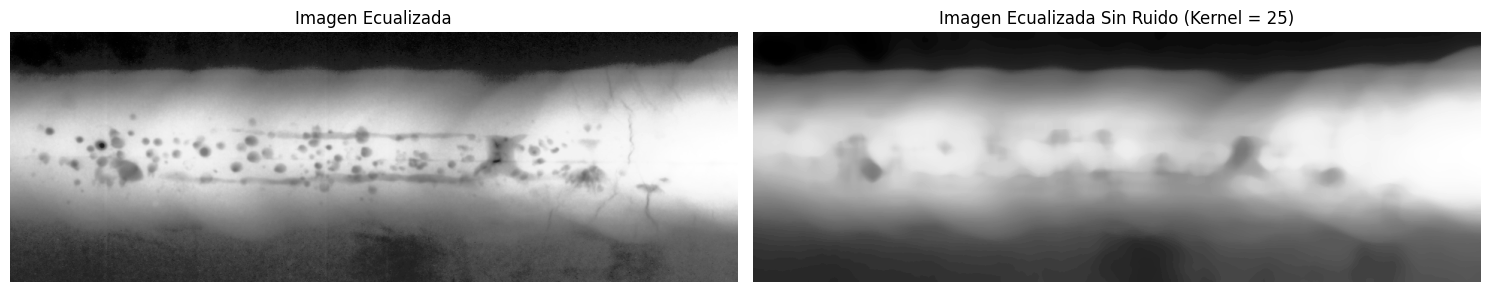

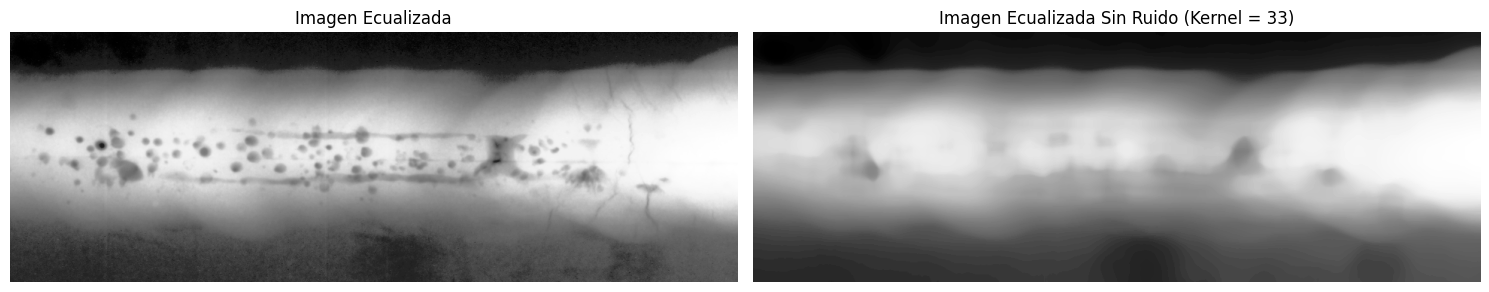

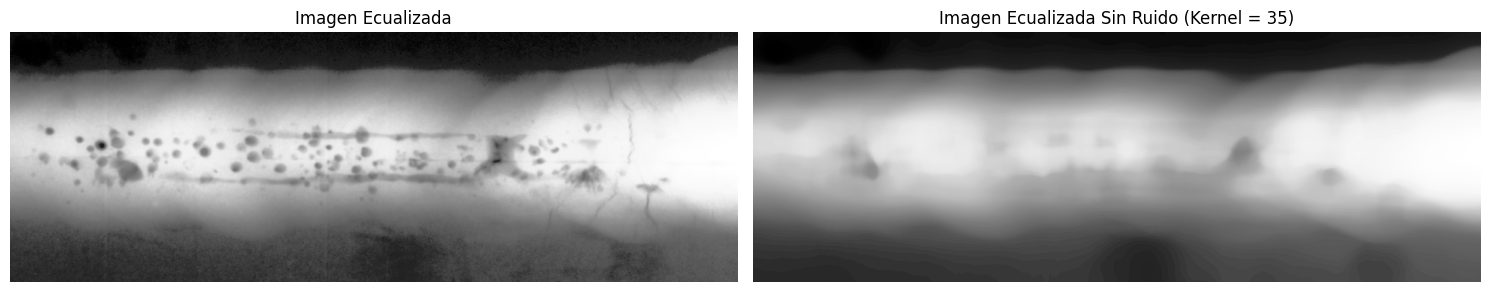

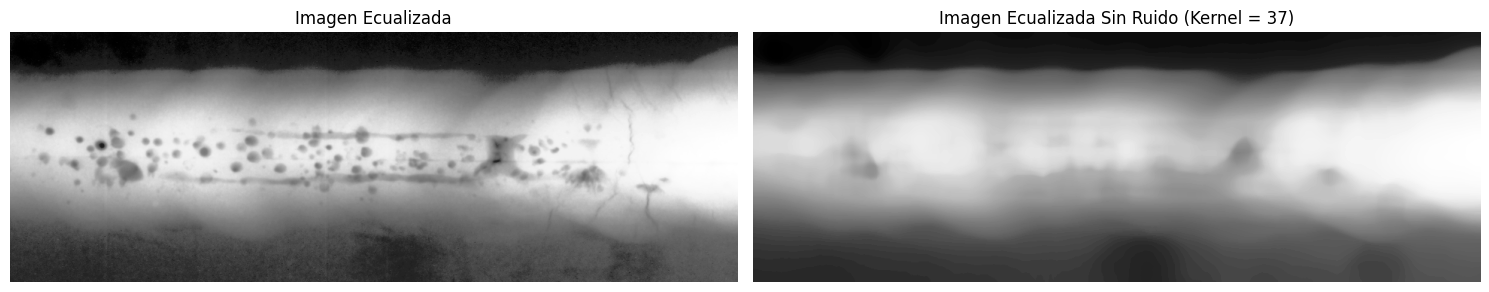

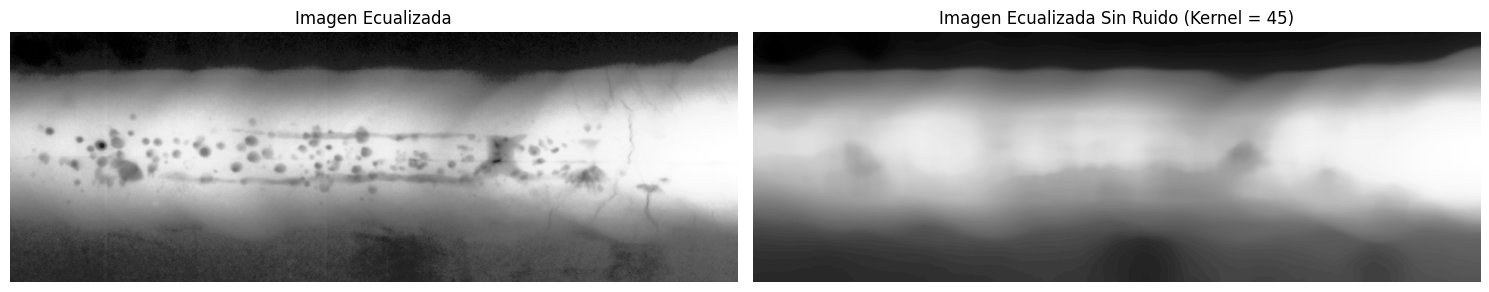

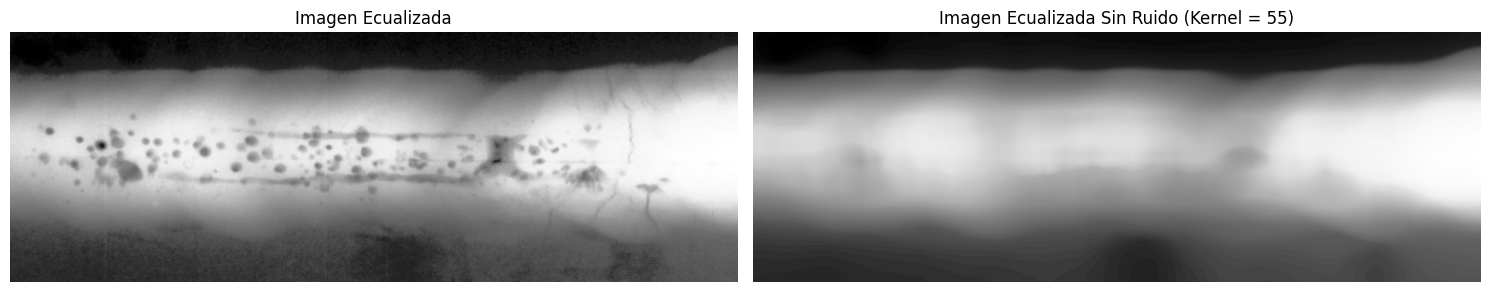

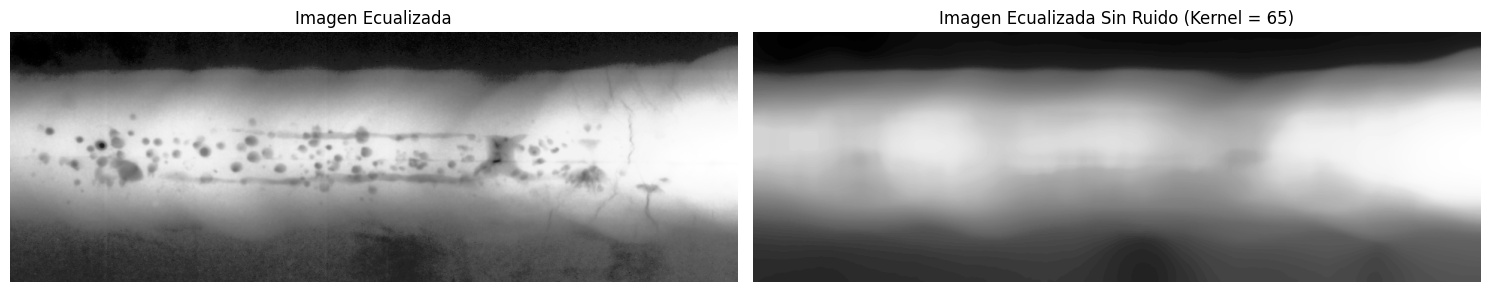

In [33]:
# Definir los tamaños de kernel (tamaño de máscara)
TamanoKernel = [3, 5, 11,13,15,17,25,33,35,37,45,55,65]

for Kernel in TamanoKernel:
    # Aplicar filtro de mediana para eliminar el ruido
    img_sin_ruido = cv2.medianBlur(img_ecualizada, Kernel)

    plt.figure(figsize=(15, 10))
    # Mostrar la imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img_ecualizada, cmap='gray')
    plt.title('Imagen Ecualizada')
    plt.axis('off')

    # Mostrar la imagen ecualizada
    plt.subplot(1, 2, 2)
    plt.imshow(img_sin_ruido, cmap='gray')
    plt.title('Imagen Ecualizada Sin Ruido (Kernel = {})'.format(Kernel))  # Corregir 'kernel' a 'Kernel'
    plt.axis('off')

    # Mostrar el multiplot
    plt.tight_layout()
    plt.show()



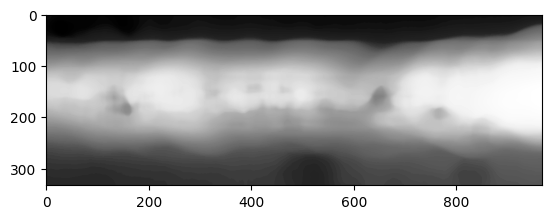

In [34]:
#Guardar la imagen sin ruido
img_sin_ruido = cv2.medianBlur(img_ecualizada, 35)
cv2.imwrite('imagen_sin_ruido.jpg', img_sin_ruido)

plt.imshow(img_sin_ruido, cmap='gray')

## Paso 4
Reste la imagen del paso-3 con la del paso-2 y despliegue el resultado por el browser (en colab). 
Analice  en  qué  casos  las  fallas  son  más  visibles  según  el  parámetro  del  paso-3  y  comente  sus 
resultados. Solo las fallas debieran ser visibles como resultado de este paso. 

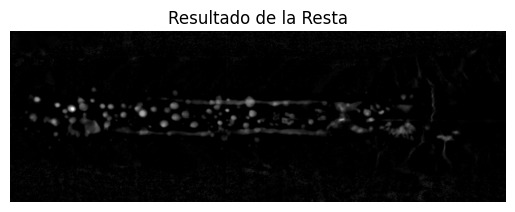

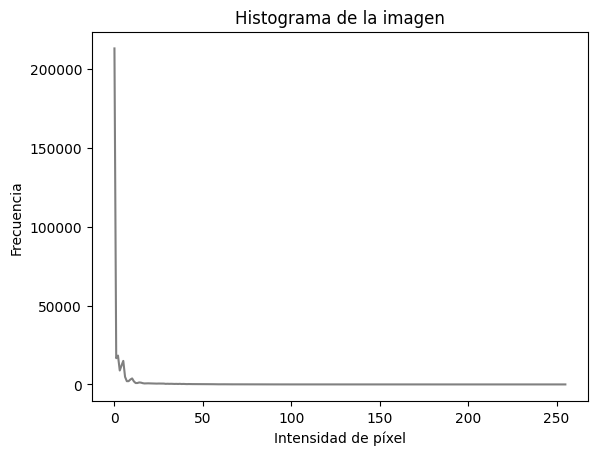

In [35]:
# Restar la imagen del paso 3 con la del paso 2
img_resultado = cv2.subtract(img_sin_ruido,img_ecualizada)

# Visualizar el resultado
plt.imshow(img_resultado, cmap='gray')
plt.title('Resultado de la Resta')
plt.axis('off')
plt.show()

# Calcular el histograma
histograma = cv2.calcHist([img_resultado ], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.plot(histograma, color='gray')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma de la imagen')
plt.show()


# Paso 5 
Binarice  la  imagen  del  paso  4  empleando  una  operación  lógica  según  un  umbral  que  usted 
defina. El objetivo de la binarización es que las fallas queden reflejadas en color blanco (valor 1) , 
y el fondo en color negro (valor 0). 

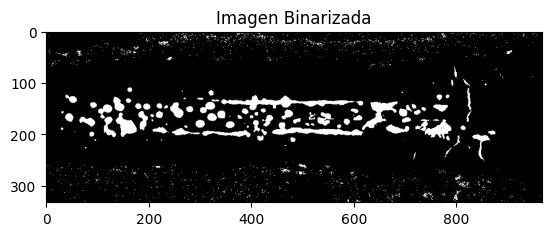

In [36]:
umbral = 10  # Umbral de binarización (ajustar según sea necesario)
_, img_binarizada = cv2.threshold(img_resultado, umbral, 255, cv2.THRESH_BINARY)
# Mostrar el histograma
plt.imshow(img_binarizada, cmap='gray')
plt.title('Imagen Binarizada')
plt.show()


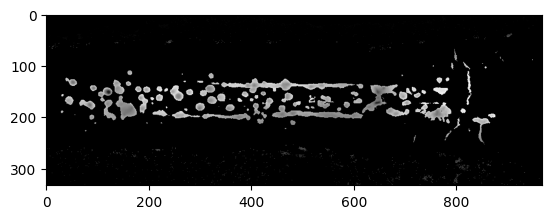

In [37]:
# Multiplicar punto a punto las imágenes
imagen_final = cv2.bitwise_and(img_ecualizada, img_binarizada)


# Mostrar la imagen final

plt.imshow(imagen_final, cmap='gray')
plt.show()